<a href="https://colab.research.google.com/github/J1-coding/NYC_taxi_trip/blob/main/termProject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New York Yellow Texi Data in Febrary 2022
=================================================================
## DataScience Term Project

## 1) Source and explanation on the dataset (texts)

The yellow texi records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. 
The data used in the attached datasets were collected and provided to the NYC Taxi by technology providers authorized under the Taxicab Passenger Enhancement Programs(TPEP/LPEP). 
The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

+ In this dataset, we are considering only the Yellow Taxi Data for the month of Febrary 2022.<br><br>
+ This dataset can be downloaded from the url below. (2022_February_Yellow Taxi Trip Records.CSV)<br>
    https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

## 2) Objective of your analysis <br>  (texts; what you want to get by analyzing this dataset)

<u>Providing practical analysis for taxi drivers</u> is the main objective of our data set. <br>Since customer’s taxi demand forecasts are only predictable based on accumulated data, these analyses are very useful for taxi drivers. Based on our analysis, taxi drivers can immediately know where there are many customers at a specific time zone.<br><br>
By analyzing a dataset of approximately 3 million rows, we can see which places are most in customer demand at certain times. Also, you can see which regions have the highest customer demand, not only by time zone but also by day of the week.
<br><br>
Furthermore, with these data, we're going to come up with three more interesting analyses.<br><br>
<u>The first is to analyze the section and time zone where the most tips come out.</u> Tip is an important source of income for New York taxi drivers.  So we're going to analyze the sections and time zones that have the most tips.<br><br>
<u>The second is the trend change analysis in New York City.</u> Based on the last 10 years of data tracking the route of taxis, we can analyze the trend of changing hot places for New Yorkers by organizing sections with high congestion and frequency by year.<br><br>
<u>The third is the trend analysis of destinations by number of passengers.</u> Dataset contains the number of passengers in the taxi. When you take a taxi alone or in groups, the origin and destination can usually have different characteristics. For example, areas where a lot of group guests get on or off may be areas where people are more likely to gather, such as parties, concerts, tourist attractions, and transportation centers. The correlation between these passengers and their location will be shown in the analysis.


## 3) Description on the dataset (statistics, tables, plots, missing values, outliers, ... etc) Make it look nice and readable.

### Attributes
|column_name|description|
|-----------|:-----------|
|VendorID|A code indicating the TPEP provider that provided the record. <br>1 : Creative Mobile Technologies <br>2 : VeriFone Inc.|
|tpep_pickup_datetime|The date and time when the meter was engaged.|
|tpep_dropoff_datetime|The date and time when the meter was disengaged.|
|passenger_count|The number of passengers in the vehicle. This is a driver-entered value.|
|trip_distance|The elapsed trip distance in miles reported by the taximeter.|
|RatecodeID|The final rate code in effect at the end of the trip. <br>1 : Standard rate <br>2 : JFK <br>3 : Newark <br>4 : Nassau or Westchester <br>5 : Negotiated fare <br>6 : Group ride|
|store_and_fwd_flag|This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y : store and forward trip <br>N : not a store and forward trip|
|PULocationID|TLC Taxi Zone in which the taximeter was engaged.|
|DOLocationID|TLC Taxi Zone in which the taximeter was disengaged.|
|payment_type|A numeric code signifying how the passenger paid for the trip. <br>1 : Credit card <br>2 : Cash <br>3 : No charge <br>4 : Dispute <br>5 : Unknown <br>6 : Voided trip|
|fare_amount|The time-and-distance fare calculated by the meter.|
|extra|Miscellaneous extras and surcharges. Currently, this only includes. the 0.50 dollar and 1 dollar rush hour and overnight charges.|
|mta_tax|0.50 MTA tax that is automatically triggered based on the metered rate in use.|
|tip_amount|Tip amount – This field is automatically populated for credit card tips.Cash tips are not included.|
|tolls_amount|Total amount of all tolls paid in trip.|
|improvement_surcharge|0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015.|
|total_amount|The total amount charged to passengers. Does not include cash tips.|
|congestion_surcharge|It represents the additional cost of New York traffic congestion.|

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#pandas and numpy for data manipulation(handling)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import inf

In [3]:
df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2022-02.parquet')

In [4]:
df.tail(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2979426,2,2022-02-28 23:50:00,2022-03-01 00:06:00,NaN,3.40,NaN,None,163,193,0,14.37,0.0,0.5,0.00,0.0,0.3,17.67,NaN,NaN
2979427,2,2022-02-28 23:06:57,2022-02-28 23:19:12,NaN,3.48,NaN,None,141,4,0,14.51,0.0,0.5,2.00,0.0,0.3,19.81,NaN,NaN
2979428,2,2022-02-28 23:48:13,2022-03-01 00:03:33,NaN,3.05,NaN,None,161,151,0,14.38,0.0,0.5,3.81,0.0,0.3,21.49,NaN,NaN
2979429,2,2022-02-28 23:56:41,2022-03-01 00:04:57,NaN,2.62,NaN,None,141,226,0,12.53,0.0,0.5,1.71,0.0,0.3,17.54,NaN,NaN
2979430,2,2022-02-28 23:04:00,2022-02-28 23:10:00,NaN,1.41,NaN,None,237,142,0,8.80,0.0,0.5,2.57,0.0,0.3,14.67,NaN,NaN


In [5]:
#Read in the data
#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2022-02.csv')

In [6]:
#Show 5 above sample in the dataset
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,1,17.0,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,2,21.0,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,2,35.5,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,2,28.0,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,1,35.5,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25


In [7]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,1,17.00,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,2,21.00,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,2,35.50,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,2,28.00,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,1,35.50,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979426,2,2022-02-28 23:50:00,2022-03-01 00:06:00,NaN,3.40,NaN,None,163,193,0,14.37,0.00,0.5,0.00,0.00,0.3,17.67,NaN,NaN
2979427,2,2022-02-28 23:06:57,2022-02-28 23:19:12,NaN,3.48,NaN,None,141,4,0,14.51,0.00,0.5,2.00,0.00,0.3,19.81,NaN,NaN
2979428,2,2022-02-28 23:48:13,2022-03-01 00:03:33,NaN,3.05,NaN,None,161,151,0,14.38,0.00,0.5,3.81,0.00,0.3,21.49,NaN,NaN
2979429,2,2022-02-28 23:56:41,2022-03-01 00:04:57,NaN,2.62,NaN,None,141,226,0,12.53,0.00,0.5,1.71,0.00,0.3,17.54,NaN,NaN


In [8]:
df.index

RangeIndex(start=0, stop=2979431, step=1)

In [9]:
#Show samples and features
df.shape

(2979431, 19)

Dataset have 2979431 samples and 18 features

In [10]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.979431e+06,2.877693e+06,2.979431e+06,2.877693e+06,2.979431e+06,2.979431e+06,2.979431e+06,2.979431e+06,2.979431e+06,2.979431e+06,2.979431e+06,2.979431e+06,2.979431e+06,2.979431e+06,2.877693e+06,2.877693e+06
mean,1.710175e+00,1.392135e+00,5.852134e+00,1.423419e+00,1.655315e+02,1.634342e+02,1.173644e+00,1.312644e+01,1.017306e+00,4.917318e-01,2.500827e+00,3.829806e-01,2.967511e-01,1.949775e+01,2.305946e+00,7.364059e-02
std,5.014011e-01,9.841230e-01,6.425304e+02,6.017545e+00,6.560966e+01,7.042023e+01,4.952479e-01,1.204619e+01,1.234659e+00,8.149128e-02,2.788297e+00,1.671188e+00,4.363037e-02,1.494599e+01,7.097711e-01,2.963704e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-6.000000e+02,-4.500000e+00,-5.000000e-01,-1.880000e+02,-2.905000e+01,-3.000000e-01,-6.003000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.080000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.176000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,2.060000e+00,0.000000e+00,3.000000e-01,1.530000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.200000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.450000e+01,2.500000e+00,5.000000e-01,3.150000e+00,0.000000e+00,3.000000e-01,2.080000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,3.487985e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,6.553500e+02,1.030000e+01,3.300000e+00,3.808000e+02,9.500000e+01,3.000000e-01,6.561500e+02,2.750000e+00,1.250000e+00


In [11]:
#Check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979431 entries, 0 to 2979430
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [12]:
#Check count of missing values
df.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          101738
trip_distance                 0
RatecodeID               101738
store_and_fwd_flag       101738
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     101738
airport_fee              101738
dtype: int64

There are about 100,000 Missing Values in a particular 4 columns.

In [13]:
#Find average value of total_amount
df['total_amount'].mean()

19.49775431588326

In [15]:
#Find average value of trip_distance
df['trip_distance'].mean()

5.8521342833576835

(array([8.906880e+05, 0.000000e+00, 2.081943e+06, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        2.600000e+01, 6.774000e+03]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

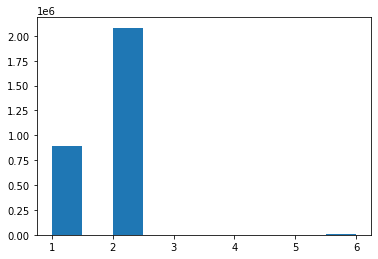

In [17]:
#VendorID's histogram
plt.hist(df['VendorID'])

It should only have values of 1 and 2, but it seems that there is an outlier. Our team will handle it later.

(array([2.40180821e-02, 8.30398208e-01, 1.62282773e-01, 4.00235729e-02,
        1.58796184e-02, 2.28022161e-02, 1.57004625e-02, 1.15833528e-06,
        3.86111761e-06, 1.15833528e-06]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

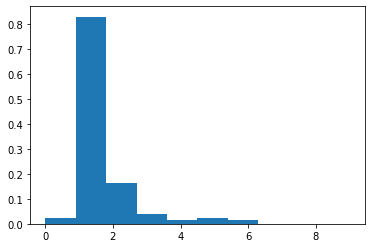

In [18]:
#Passenger_count's histogram
plt.hist(df['passenger_count'],range=(df['passenger_count'].min(),df['passenger_count'].max()),density=True)

(array([0.        , 0.96526402, 0.02695141, 0.00169874, 0.00115703,
        0.0049288 ]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

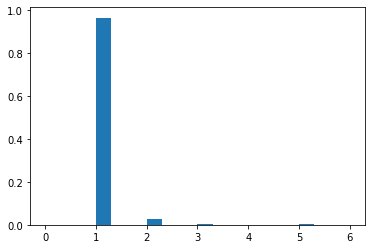

In [19]:
#RatecodeID's histogram
plt.hist(df['RatecodeID'],range(0,7),density=True,align='mid',width=0.3)

(array([6.82935769e-02, 0.00000000e+00, 1.54138089e+00, 0.00000000e+00,
        3.73296780e-01, 0.00000000e+00, 8.80168059e-03, 0.00000000e+00,
        8.22640296e-03, 6.71269111e-07]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

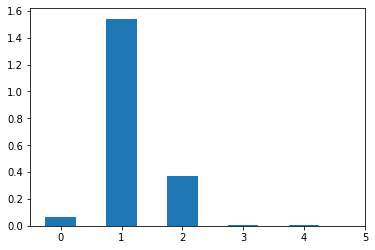

In [20]:
#Payment_type's histogram
plt.hist(df['payment_type'],align='left',density=True)

([<matplotlib.patches.Wedge at 0x7f29b0ccc6d0>,
 [Text(0.6475991427421752, 0.8891655359490717, 'CMT'),
  Text(-0.6475991427421756, -0.8891655359490714, 'VeriFone')],
 [Text(0.3532358960411865, 0.48499938324494807, '29.96%'),
  Text(-0.3532358960411866, -0.484999383244948, '70.04%')])

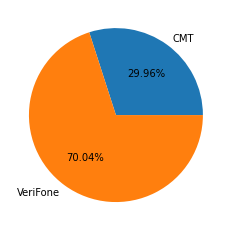

In [21]:
#VendorID's piegraph
condition = (df.VendorID == 1)
v1 = df[condition].shape[0]

condition = (df.VendorID == 2)
v2 = df[condition].shape[0]

langs = ['CMT','VeriFone']
num = [v1,v2]
plt.pie(num,labels=langs,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x7f29b0bec150>,
 [Text(-1.0934567959991228, 0.11980081503618077, 'Standard Rate'),
  Text(1.0902002682318814, -0.14650384004228056, 'JFK'),
  Text(1.098955829942724, -0.04791746899512432, 'Newark'),
  Text(1.0993414962635613, -0.038056203081685565, 'Nassau,Westchester'),
  Text(1.09986759133716, -0.01706697179332043, 'Negotiated fare'),
  Text(1.0999999994444172, -3.496115340959731e-05, 'Group ride')],
 [Text(-0.5964309796358851, 0.06534589911064405, '96.53%'),
  Text(0.5946546917628444, -0.07991118547760757, '2.70%'),
  Text(0.5994304526960312, -0.02613680127006781, '0.17%'),
  Text(0.5996408161437606, -0.020757928953646667, '0.12%'),
  Text(0.5999277770929963, -0.009309257341811143, '0.49%'),
  Text(0.5999999996969548, -1.906972004159853e-05, '0.00%')])

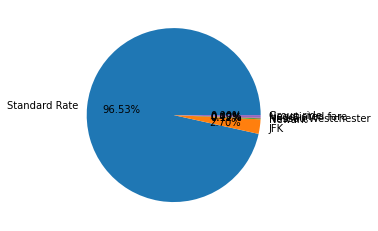

In [25]:
#RatecodeID's piegraph
data = df
c1=(data.RatecodeID==1)
c2=(data.RatecodeID==2)
c3=(data.RatecodeID==3)
c4=(data.RatecodeID==4)
c5=(data.RatecodeID==5)
c6=(data.RatecodeID==6)
v1=data[c1].shape[0]
v2=data[c2].shape[0]
v3=data[c3].shape[0]
v4=data[c4].shape[0]
v5=data[c5].shape[0]
v6=data[c6].shape[0]
langs=['Standard Rate','JFK','Newark','Nassau,Westchester','Negotiated fare','Group ride']
num=[v1,v2,v3,v4,v5,v6]
plt.pie(num,labels=langs,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x7f29b0b43d90>,
 [Text(1.0977917534932309, 0.06966538568225615, 'Store'),
  Text(-1.097791757569819, -0.0696653214430797, 'Not Store')],
 [Text(0.5987955019053985, 0.03799930128123063, '2.02%'),
  Text(-0.5987955041289922, -0.03799926624167983, '97.98%')])

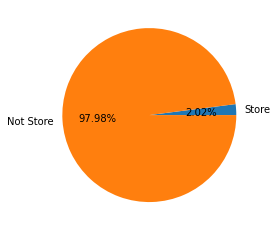

In [26]:
#Store_and_fwd_flag's piegraph
c1=(data.store_and_fwd_flag=='Y')
c2=(data.store_and_fwd_flag=='N')
v1=data[c1].shape[0]
v2=data[c2].shape[0]
langs=['Store','Not Store']
num=[v1,v2]
plt.pie(num,labels=langs,autopct='%1.2f%%')

In the case of the starting position and the arriving position, the range is very large from 1 to 265, and visibility seems to be insufficient even when displayed as a histogram. I'm going to look for a better way. We think the total taxi fare and total travel distance can be shown in the boxplot to show how much the outlier and data are formed.

Text(0.5, 1.0, 'Total amount')

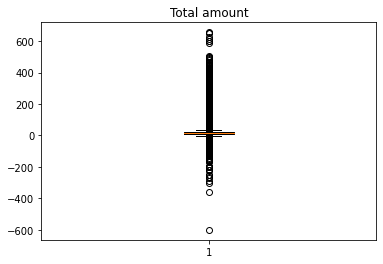

In [27]:
#total_amount's boxplot
plt.boxplot(data['total_amount'])
plt.title("Total amount")

Text(0.5, 1.0, 'Trip Distance')

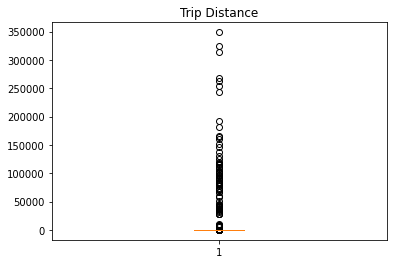

In [28]:
#trip_distance's boxplot
plt.boxplot(data['trip_distance'])
plt.title("Trip Distance")

Text(0.5, 1.0, 'Fare Amount')

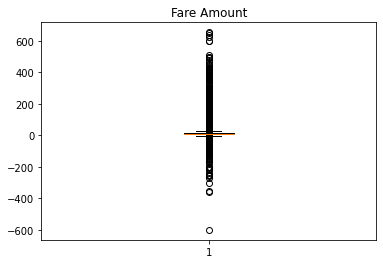

In [29]:
#fare_amount's boxplot
plt.boxplot(data['fare_amount'])
plt.title("Fare Amount")

As you can see from the above 3 graphs, the amount of data itself is too large, so there are many outsiders. We think we'll have to deal with these data later.

<Figure size 1080x1080 with 0 Axes>

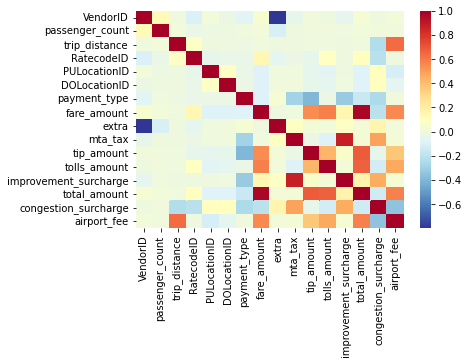

<Figure size 1080x1080 with 0 Axes>

In [30]:
#correlation heatmap
corrdata=data.corr()

sns.heatmap(corrdata,cmap='RdYlBu_r')
plt.figure(figsize=(15,15))

In [31]:
#Groupby PULocationID
grd=data.groupby(["PULocationID"]).count()

PUL=grd.iloc[:,0]
PUL=PUL.to_frame()
PUL.columns=['Number of Passengers']
PUL

,Number of Passengers
PULocationID,
1,355
2,3
3,38
4,4026
5,42
...,...
261,11204
262,42964
263,68463


In [32]:
#Groupby ascending order of PULocationID
grd=data.groupby(["PULocationID"]).count()
PUL=grd.iloc[:,0]
PUL=PUL.to_frame()
PUL.columns=['Number of Passengers']
PUL.sort_values(by=['Number of Passengers'],axis=0,ascending=False)

,Number of Passengers
PULocationID,
237,142615
236,134848
161,114600
132,106113
142,98234
...,...
206,2
176,1
99,1


In [33]:
#Groupby ascending order of DOLocationID
grd=data.groupby(["DOLocationID"]).count()
DOL=grd.iloc[:,0]
DOL=DOL.to_frame()
DOL.columns=['Number of Passengers']
DOL.sort_values(by=['Number of Passengers'],axis=0,ascending=False)

,Number of Passengers
DOLocationID,
236,139051
237,124631
161,99172
170,88876
239,88387
...,...
187,11
204,3
99,3


There is a limit to seeing it as a plot, so first of all, through the groupby operation, a new data frame of the location where customers ride the most and get off can be created to give information to the area where there are many customers from the taxi drivers

In [34]:
#Drop missing value type 'object'
data = data.dropna(subset = ['store_and_fwd_flag'])

data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

In [35]:
data.shape

(2877693, 19)

In [36]:
data.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,1,17.0,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,2,21.0,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,2,35.5,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,2,28.0,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,1,35.5,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25
5,1,2022-02-01 00:57:23,2022-02-01 01:07:31,2.0,2.30,1.0,N,140,142,1,10.0,3.00,0.5,2.75,0.00,0.3,16.55,2.5,0.00
6,1,2022-02-01 00:34:17,2022-02-01 01:01:32,1.0,7.50,1.0,N,140,36,1,25.0,3.00,0.5,5.00,0.00,0.3,33.80,2.5,0.00
7,2,2022-02-01 00:03:26,2022-02-01 00:07:30,1.0,0.88,1.0,N,48,68,1,5.0,0.50,0.5,1.76,0.00,0.3,10.56,2.5,0.00
8,2,2022-02-01 00:13:31,2022-02-01 00:31:41,1.0,6.48,1.0,N,142,244,1,21.0,0.50,0.5,4.96,0.00,0.3,29.76,2.5,0.00
9,2,2022-02-01 00:52:11,2022-02-01 01:02:48,1.0,3.29,1.0,N,238,116,1,12.0,0.50,0.5,2.66,0.00,0.3,15.96,0.0,0.00


In [37]:
data = data.drop(['VendorID', 'payment_type'],axis = 1)

In [38]:
data.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,17.0,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25
1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,21.0,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25
2,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,35.5,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25
3,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,28.0,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00
4,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,35.5,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25
5,2022-02-01 00:57:23,2022-02-01 01:07:31,2.0,2.30,1.0,N,140,142,10.0,3.00,0.5,2.75,0.00,0.3,16.55,2.5,0.00
6,2022-02-01 00:34:17,2022-02-01 01:01:32,1.0,7.50,1.0,N,140,36,25.0,3.00,0.5,5.00,0.00,0.3,33.80,2.5,0.00
7,2022-02-01 00:03:26,2022-02-01 00:07:30,1.0,0.88,1.0,N,48,68,5.0,0.50,0.5,1.76,0.00,0.3,10.56,2.5,0.00
8,2022-02-01 00:13:31,2022-02-01 00:31:41,1.0,6.48,1.0,N,142,244,21.0,0.50,0.5,4.96,0.00,0.3,29.76,2.5,0.00
9,2022-02-01 00:52:11,2022-02-01 01:02:48,1.0,3.29,1.0,N,238,116,12.0,0.50,0.5,2.66,0.00,0.3,15.96,0.0,0.00


In [39]:
len(data[data['trip_distance'] <= 0])

30689

In [40]:
data.groupby('RatecodeID')['trip_distance'].median()

RatecodeID
1.0      1.700
2.0     18.140
3.0     17.245
4.0     18.090
5.0      0.000
6.0      0.000
99.0     5.000
Name: trip_distance, dtype: float64

In [41]:
len(data[data['total_amount'] <= 0])

16120

In [42]:
data = data[data['total_amount']>0]

In [43]:
len(data[data['total_amount'] <= 0])

0

In [44]:
len(data[data['trip_distance'] <= 0])

28161

In [45]:
data = data[data['trip_distance']>0]

In [46]:
data.shape

(2833412, 17)

In [47]:
len(data[data['passenger_count'] <= 0])

61075

In [48]:
data = data[data['passenger_count']>0]

In [49]:
data.shape

(2772337, 17)

In [50]:
len(data[data['RatecodeID'] > 6 ])

8866

In [51]:
data = data[data['RatecodeID'] <=6]

In [52]:
data.shape

(2763471, 17)

In [53]:
#Encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
data['store_and_fwd_flag'] = le.fit_transform(data['store_and_fwd_flag'])
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,0,138,252,17.0,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25
1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,0,138,41,21.0,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25
2,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,0,138,200,35.5,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25
3,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,0,239,200,28.0,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00
4,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,0,138,125,35.5,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25


In [55]:
data['store_and_fwd_flag'].value_counts()

0    2710411
1      53060
Name: store_and_fwd_flag, dtype: int64

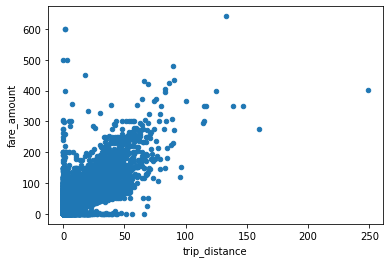

In [56]:
data[data['trip_distance'].between(0,500)].plot.scatter('trip_distance', 'fare_amount')
plt.show()

In [57]:
data.tail()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2877688,2022-02-28 23:46:51,2022-02-28 23:54:36,2.0,1.70,1.0,0,100,142,8.0,3.0,0.5,3.50,0.0,0.3,15.30,2.5,0.0
2877689,2022-02-28 23:03:32,2022-02-28 23:11:37,1.0,1.51,1.0,0,116,247,7.5,0.5,0.5,0.00,0.0,0.3,8.80,0.0,0.0
2877690,2022-02-28 23:15:13,2022-02-28 23:23:25,1.0,1.20,1.0,0,230,170,7.5,0.5,0.5,2.26,0.0,0.3,13.56,2.5,0.0
2877691,2022-02-28 23:33:22,2022-02-28 23:56:45,1.0,5.62,1.0,0,114,239,20.5,0.5,0.5,4.86,0.0,0.3,29.16,2.5,0.0
2877692,2022-02-28 23:42:45,2022-02-28 23:50:09,1.0,1.90,1.0,0,140,236,8.0,0.5,0.5,2.36,0.0,0.3,14.16,2.5,0.0


In [66]:

def calculatePricePerMeter(dataSet) :
  dF = pd.read_parquet(dataSet)
  pricePerMeter_dF = (dF['total_amount'].values - dF['tip_amount'].values)/dF['trip_distance'].values
  pricePerMeter_dF[pricePerMeter_dF == inf] = 0
  pricePerMeter_dF[pricePerMeter_dF == -inf] = 0
  np.nan_to_num(pricePerMeter_dF, copy=False)

  
  print(pricePerMeter_dF.sum())
  print(np.count_nonzero(pricePerMeter_dF))
  print(dataSet)
  print("$",pricePerMeter_dF.sum()/np.count_nonzero(pricePerMeter_dF))
  
  
dataSetList = ['/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2015-03.parquet',
               '/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2015-06.parquet',
               '/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2015-09.parquet',
               '/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2015-12.parquet',
               '/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2017-03.parquet',
               '/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2017-06.parquet',
               '/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2017-09.parquet',
               '/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2017-12.parquet',
               '/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2019-03.parquet',
               '/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2019-06.parquet',
               '/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2019-09.parquet',
               '/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2019-12.parquet',
               '/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2021-03.parquet',
               '/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2021-06.parquet',
               '/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2021-09.parquet',
               '/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2021-12.parquet',
               ]

#store 'average fare per meter' of each month in 'results' list
results = []
for i in dataSetList:
    results.append(calculatePricePerMeter(i))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


98310922.16966178
13263191
/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2015-03.parquet
$ 7.41231293205849
93489157.81750202
12249082
/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2015-06.parquet
$ 7.632339943311835
83771453.04400802
11147630
/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2015-09.parquet
$ 7.514732103954653
87614698.67945948
11384704
/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2015-12.parquet
$ 7.695825792173383
81317842.98332673
10228802
/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2017-03.parquet
$ 7.949889242486728
76100678.18829238
9592316
/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2017-06.parquet
$ 7.933504086843301
71038123.73133852
8884529
/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2017-09.parquet
$ 7.995710715935365
77842529.06390953
9448936
/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2017-12.parquet
$ 8.238232226772361
79123087.64133638
7812295
/content/drive/MyDrive/Colab Noteb